In [30]:
import numpy as np
import re
import spacy
from rake_nltk import Rake
from googletrans import Translator

gt = Translator()

rake = Rake(min_length=3, max_length=5)
nlp = spacy.load("en_core_web_lg")
#nlp.max_length = 1_500_000

with open("/home/alex/Diplom/texts/user_books/Omelas.txt", "r") as f:
    text = f.read()

text = text.replace("\n", " ")
text = text.replace("\t", " ")

doc = nlp(text)


/home/alex/.local/lib/python3.10/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_lg' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
import sys

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
regex = re.compile('[@_!#$%^&*()<>?/\\\|}{~:[\]]') 

In [5]:
def np_key_word_translator():
    
    size = len(list(doc.sents))
    modified_sents = np.empty(size, dtype=object)
    #flag = False
    docsz = len(list(doc.sents))
                
    for i, sent in enumerate(doc.sents):

#        print(f"{i+1}/{docsz}")
        
        rake.extract_keywords_from_text(sent.text)
        key_phrases = rake.get_ranked_phrases()
        text = sent.text

        for key_phrase in key_phrases:
            
            if regex.search(key_phrase) is not None:
                continue
            
            bounds = re.search(key_phrase, text, re.IGNORECASE)    

            if bounds is None:
                continue
                
            #tr = gt.translate(key_phrase, src="en", dest="ru").text
            text = text[:bounds.end(0) + 1] + "(tr...)" + text[bounds.end(0)+1:]
    
        modified_sents[i] = text
    
    return modified_sents

In [6]:
%timeit np_key_word_translator()

8.15 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
#np.savetxt("tst.txt", r, newline="\n\n", fmt='%s')

NameError: name 'r' is not defined

In [ ]:
np.savetxt?

In [26]:
def func(user_text):
    rake.extract_keywords_from_text(user_text)
    key_phrases = rake.get_ranked_phrases()
    print(key_phrases)
    text = user_text

    for key_phrase in key_phrases:
        if regex.search(key_phrase) is not None:
            continue

        bounds = re.search(key_phrase, text, re.IGNORECASE)    

        if bounds is None:
            continue

        tr = gt.translate(key_phrase, src="en", dest="ru").text
        text = text[:bounds.end(0) + 1] +  f"({tr})" + text[bounds.end(0)+1:]
   
    return text

In [27]:
def map_np_key_word_translator():
    
    size = len(list(doc.sents))
    modified_sents = np.empty(size, dtype=object)
                
    for i, sent in enumerate(doc.sents):
        modified_sents[i] = "".join(map(func, (sent.text,)))
    
    return modified_sents

In [10]:
%timeit map_np_key_word_translator()

7.26 ms ± 33 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
import re
import spacy

/home/alex/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-06 14:36:51.786833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 14:36:54.130511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 14:36:54.146081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must 

In [14]:
nlp = spacy.load("en_core_web_lg")
with open("/home/alex/Diplom/texts/user_books/67979.txt", "r") as f:
    text = f.read()

#text = text.replace("\n", " ")
#text = text.replace("\t", " ")



In [24]:

splitted_by_tab = text.split("\n\n")
splitted_by_tab = list(map(lambda string: string.replace("\n", " "), splitted_by_tab))

In [25]:
len(splitted_by_tab)

1622

In [26]:
splitted_by_tab[101]

'Valancy dropped _Thistle Harvest_ like a hot coal and fled downstairs to her patches; but she felt the strange exhilaration of spirit that always came momentarily to her when she dipped into one of John Foster’s books. Valancy did not know much about woods—except the haunted groves of oak and pine around her Blue Castle. But she had always secretly hankered after them and a Foster book about woods was the next best thing to the woods themselves.'

In [27]:
%time piped_doc = nlp.pipe(splitted_by_tab, n_process=-1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 6.91 µs


In [29]:
for sub_doc in piped_doc:
    for sent in sub_doc.sents:
        print(sent, "\n\n")

_The_ BLUE CASTLE 


_A NOVEL_ 


BY L. M. MONTGOMERY 


NEW YORK FREDERICK A. STOKES COMPANY MCMXXVI 


 CONTENTS 


 CHAPTER I  CHAPTER II  CHAPTER III  CHAPTER IV  CHAPTER V  CHAPTER VI  CHAPTER VII  CHAPTER VIII  CHAPTER IX   


CHAPTER X  CHAPTER XI  CHAPTER XII  CHAPTER XIII  CHAPTER XIV  CHAPTER XV  CHAPTER XVI  CHAPTER XVII  CHAPTER XVIII  CHAPTER XIX  CHAPTER XX   


CHAPTER XXI  CHAPTER XXII  CHAPTER XXIII  CHAPTER XXIV  CHAPTER XXV  CHAPTER XXVI  CHAPTER XXVII  CHAPTER XXVIII  CHAPTER XXIX  CHAPTER XXX  CHAPTER XXXI   


CHAPTER XXXII  CHAPTER XXXIII  CHAPTER XXXIV  CHAPTER XXXV  CHAPTER XXXVI  CHAPTER XXXVII  CHAPTER XXXVIII  CHAPTER XXXIX  CHAPTER XL  CHAPTER XLI  CHAPTER XLII   


CHAPTER XLIII  CHAPTER XLIV  CHAPTER XLV 


 THE BLUE CASTLE 


 CHAPTER I 


  


If it had not rained on a certain May morning Valancy Stirling’s whole life would have been entirely different. 


She would have gone, with the rest of her clan, to Aunt Wellington’s engagement picnic and Dr. Tre

Her plea went unheeded. 


While she argued with one girl another scraped up her dust-pile. 


Valancy turned away, her heart swelling, her eyes full of tears. 


“Jealous—you’re jealous!” 


said the girls mockingly. 


“You were very selfish,” said her mother coldly, when Valancy told her about it at night. 


That was the first and last time Valancy had ever taken any of her troubles to her mother. 


Valancy was neither jealous nor selfish. 


It was only that she wanted a dust-pile of her own—small or big mattered not. 


A team of horses came down the street—Olive’s dust pile was scattered over the roadway—the bell rang—the girls trooped into school and had forgotten the whole affair before they reached their seats. 


Valancy never forgot it. 


To this day she resented it in her secret soul. 


But was it not symbolical of her life? 


“I’ve never been able to have my own dust-pile,” thought Valancy. 


The enormous red moon she had seen rising right at the end of the street on

“Where am I to get one? 


I can pay decent wages if I could get a decent woman. 


D’ye think I like old hags?” 


“Will I do?” said Valancy. 


 CHAPTER XV 


 “Let us be calm,” said Uncle Benjamin. 


“Let us be perfectly calm.” 


“Calm!” 


Mrs. Frederick wrung her hands. 


“How can I be calm—how could anybody be calm under such a disgrace as this?” 


“Why in the world did you let her go?” asked Uncle James. 


“_Let_ her! 


How could I stop her, James? 


It seems she packed the big valise and sent it away with Roaring Abel when he went home after supper, while Christine and I were out in the kitchen. 


Then Doss herself came down with her little satchel, dressed in her green serge suit. 


I felt a terrible premonition. 


I can’t tell you how it was, but I seemed to _know_ that Doss was going to do something dreadful.” 


“It’s a pity you couldn’t have had your premonition a little sooner,” said Uncle Benjamin drily. 


“I said, ‘Doss, _where are you going_?’ 


and _she_ s

They sat in silence for a long while. 


Little rabbits hopped across the road. 


Once or twice an owl laughed out delightfully. 


The road beyond them was fringed with the woven shadow lace of trees. 


Away off to the southwest the sky was full of silvery little cirrus clouds above the spot where Barney’s island must be. 


Valancy was perfectly happy. 


Some things dawn on you slowly. 


Some things come by lightning flashes. 


Valancy had had a lightning flash. 


She knew quite well now that she loved Barney. 


Yesterday she had been all her own. 


Now she was this man’s. 


Yet he had done nothing—said nothing. 


He had not even looked at her as a woman. 


But that didn’t matter. 


Nor did it matter what he was or what he had done. 


She loved him without any reservations. 


Everything in her went out wholly to him. 


She had no wish to stifle or disown her love. 


She seemed to be his so absolutely that thought apart from him—thought in which he did not predominate—

“I’m the only one round at present,” said Valancy. 


“What will your poor mother say?” moaned Cousin Georgiana. 


“Come along with me and hear, if you want to know,” said Valancy. 


“I’m on my way to tell her now.” 


Cousin Georgiana let go the gate-post cautiously and found that she could stand alone. 


She meekly trotted on beside Valancy—who suddenly seemed quite a different person in her eyes. 


Cousin Georgiana had a tremendous respect for a married woman. 


But it was terrible to think of what the poor girl had done. 


So rash. 


So reckless. 


Of course Valancy must be stark mad. 


But she seemed so happy in her madness that Cousin Georgiana had a momentary conviction that it would be a pity if the clan tried to scold her back to sanity. 


She had never seen that look in Valancy’s eyes before. 


But what _would_ 


Amelia say? 


And Ben? 


“To marry a man you know nothing about,” thought Cousin Georgiana aloud. 


“I know more about him than I know of Edward Beck,

“Why can’t I die now—this very minute—when I am so happy!” thought Valancy. 


Well, it couldn’t be so very long now. 


Somehow, Valancy had always felt she would live out the year Dr. Trent had allotted. 


She had not been careful—she had never tried to be. 


But, somehow, she had always counted on living out her year. 


She had not let herself think about it at all. 


But now, sitting here beside Barney, with her hand in his, a sudden realisation came to her. 


She had not had a heart attack for a long while—two months at least. 


The last one she had had was two or three nights before Barney was out in the storm. 


Since then she had not remembered she had a heart. 


Well, no doubt, it betokened the nearness of the end. 


Nature had given up the struggle. 


There would be no more pain. 


“I’m afraid heaven will be very dull after this past year,” thought Valancy. 


“But perhaps one will not remember. 


Would that be—nice? 


No, no. 


I don’t want to forget Barney. 



“Go up and tell Valancy to come down. 


Her husband is here.” 


But so dubious was Uncle Benjamin as to whether Valancy could really come down in a minute—or at all—that he followed Mrs. Frederick on tiptoe up the stairs and listened in the hall. 


“Valancy dear,” said Mrs. Frederick tenderly, “your husband is in the parlour, asking for you.” 


“Oh, Mother.” Valancy got up from the window and wrung her hands. 


“I cannot see him—I cannot! 


Tell him to go away—_ask_ him to go away. 


I can’t see him!” 


“Tell her,” hissed Uncle Benjamin through the keyhole, “that Redfern says he won’t go away until he _has_ seen her.” 


Redfern had not said anything of the kind, but Uncle Benjamin thought he was that sort of a fellow. 


Valancy knew he was. 


She understood that she might as well go down first as last. 


She did not even look at Uncle Benjamin as she passed him on the landing. 


Uncle Benjamin did not mind. 


Rubbing his hands and chuckling, he retreated to the kitchen, w

In [3]:
def get_doc():
    doc = nlp(text, disable=["ner"])
    return doc

In [4]:
doc = get_doc()

In [6]:
for i, sent in enumerate(doc.sents):

    i+=1
    if i > 100:
        print(sent.text, "\n\n")

And Valancy had long ago decided that she would rather offend God than Aunt Wellington, because God might forgive her but Aunt Wellington never would.   


Aunt Alberta, enormously fat, with an amiable habit of always referring to her husband as “he,” as if he were the only male creature in the world, who could never forget that she had been a great beauty in her youth, would condole with Valancy on her sallow skin—  “I don’t know why all the girls of today are so sunburned. 


When _I_ was a girl my skin was roses and cream. 


I was counted the prettiest girl in Canada, my dear.”   


Perhaps Uncle Herbert wouldn’t say anything—or perhaps he would remark jocularly, “How fat you’re getting, Doss!” 


And then everybody would laugh over the excessively humorous idea of poor, scrawny little Doss getting fat.   


Handsome, solemn Uncle James, whom Valancy disliked but respected because he was reputed to be very clever and was therefore the clan oracle—brains being none too plentiful in 

In [1]:
from matplotlib import pyplot as plt

In [24]:
xs = [0, 0.5559, 1.6375, 0, 0.8152, 1.2813]
labels = ["A1", "A2", "B1", "B2", "C1", "Total"]

ValueError: dictionary update sequence element #0 has length 6; 2 is required

<BarContainer object of 6 artists>

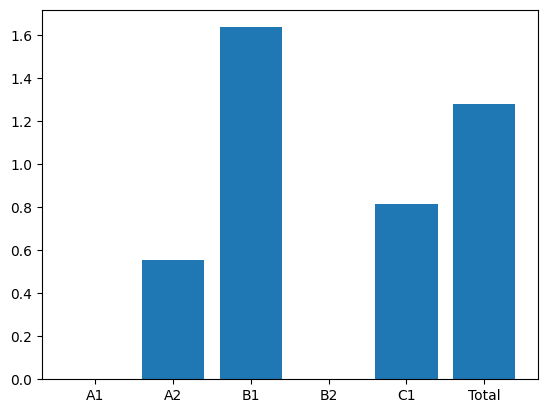

In [9]:
plt.bar(labels, xs)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
df = pd.DataFrame({"freq": xs, "lvl": labels})

In [26]:
df

,freq,lvl
0,0.0000,A1
1,0.5559,A2
2,1.6375,B1
3,0.0000,B2
4,0.8152,C1
5,1.2813,Total


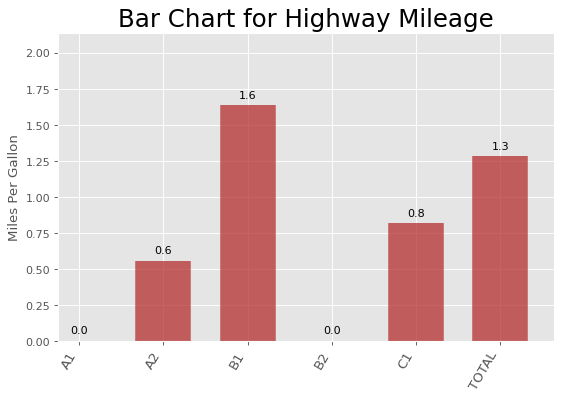

In [60]:

# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
#df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
#df.sort_values('cty', inplace=True)
#df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,5), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.freq, color='firebrick', alpha=0.7, linewidth=50)

# Annotate Text
for i, freq in enumerate(df.freq):
    ax.text(i, freq+0.05, round(freq, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, max(df.freq) + 0.5), xlim = (-0.25, max(df.freq) + 4))
plt.xticks(df.index, df.lvl.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
#p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
#p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
#fig.add_artist(p1)
#fig.add_artist(p2)
plt.show()

In [14]:
df.cty?

In [1]:
data = [('harbor',
  'NN',
  0.0,
  0.0,
  0.0,
  0.0,
  0.1804,
  0.045,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0)]


In [125]:
df = pd.DataFrame(
    data, 
    columns=[
        "word",
        "tag",
        "A1", 
        "A2",
        "B1",
        "B2",
        "C1",
        "total",
        "A1_ds",
        "A2_ds",
        "B1_ds",
        "B2_ds",
        "C1_ds",
        "total_ds",
    ]
)
df

,word,tag,A1,A2,B1,B2,C1,total,A1_ds,A2_ds,B1_ds,B2_ds,C1_ds,total_ds
0,harbor,NN,0.0,0.0,0.0,0.0,0.1804,0.045,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
df[["A1", "A2", "B1", "B2", "C1", "total"]]

,A1,A2,B1,B2,C1,total
0,0.0,0.0,0.0,0.0,0.1804,0.045


In [126]:
SUBSET_1 = ["A1", "A2", "B1", "B2", "C1", "total"]
SUBSET_2 = ["A1_ds", "A2_ds", "B1_ds", "B2_ds", "C1_ds" ,"total_ds"]
df[SUBSET_1].values

array([[0.    , 0.    , 0.    , 0.    , 0.1804, 0.045 ]])

In [74]:
for i, freq in enumerate(df[SUBSET_1].values[0]):
    print(i, freq)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.1804
5 0.045


In [140]:
def plotter(df):
    
    ax1_values = df[SUBSET_1].values[0]
    ax2_values = df[SUBSET_2].values[0]
    
    plt.style.use('ggplot')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), facecolor='white', dpi= 80)
    
    ax1.vlines(x=SUBSET_1, ymin=0, ymax=ax1_values, color='firebrick', alpha=0.7, linewidth=50)

    # Annotate Text
    for i, freq in enumerate(ax1_values):
        ax1.text(i, float(freq)+0.01, freq, horizontalalignment='center')


    # Title, Label, Ticks and Ylim
    ax1.set_title("Frequencies", fontdict={'size':22})
    ax1.set(xlabel = "CEFR level", ylabel='Frequency (normalized/million)', ylim=(0, max(ax1_values) + 0.1), xlim = (-0.25, max(ax1_values) + 5.5))
    ax1.set_xticks(SUBSET_1, rotation=60, horizontalalignment='right', fontsize=12)

    
    
    ax2.vlines(x=SUBSET_2, ymin=0, ymax=ax2_values, color='firebrick', alpha=0.7, linewidth=50)

    # Annotate Text
    for i, freq in enumerate(ax2_values):
        ax2.text(i, freq+0.01, freq, horizontalalignment='center')


    # Title, Label, Ticks and Ylim
    ax2.set_title("Frequencies", fontdict={'size':22})
    ax2.set(xlabel = "CEFR level (dataset)", ylabel='Frequency (dataset)', ylim=(0, max(ax2_values) + 0.1), xlim = (-0.25, max(ax2_values) + 4.5))
    ax2.set_xticks(SUBSET_2, rotation=60, horizontalalignment='right', fontsize=12)

    
    #plt.xticks(SUBSET_1, rotation=60, horizontalalignment='right', fontsize=12)

    plt.show()

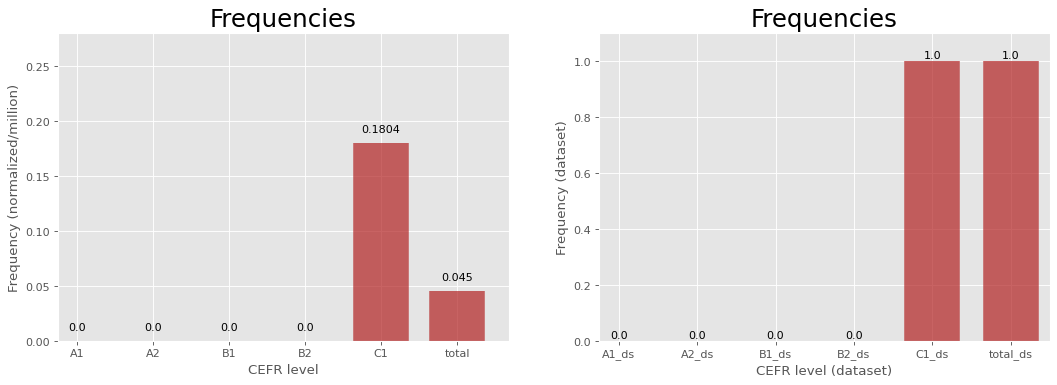

In [141]:
plotter(df)

In [137]:
df1 = pd.DataFrame([[1,2,3], [1,1,1]], columns=["A1", "A1", "A1"])

In [138]:
df1

,A1,A1,A1
0,1,2,3
1,1,1,1


In [139]:
df1.A1

,A1,A1,A1
0,1,2,3
1,1,1,1


In [3]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

ModuleNotFoundError: No module named 'keybert'